In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv(r"C:\Users\VINAY\Downloads\archive (17)\twitter_training.csv")

validation_data = pd.read_csv(r"C:\Users\VINAY\Downloads\archive (17)\twitter_validation.csv")

In [3]:
train_data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
validation_data.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [5]:
column_name = ['ID', 'Entity', 'Sentiment', 'Content']

train_data.columns = column_name
validation_data.columns = column_name

### Concatenating both datasets

In [6]:
df = pd.concat([train_data, validation_data], ignore_index = False)

In [7]:
df.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75680 entries, 0 to 998
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         75680 non-null  int64 
 1   Entity     75680 non-null  object
 2   Sentiment  75680 non-null  object
 3   Content    74994 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


### Check the distribution of target labels

In [9]:
sentiment_counts = df['Sentiment'].value_counts()

### Plotting Sentiment Distribution

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='Sentiment'>

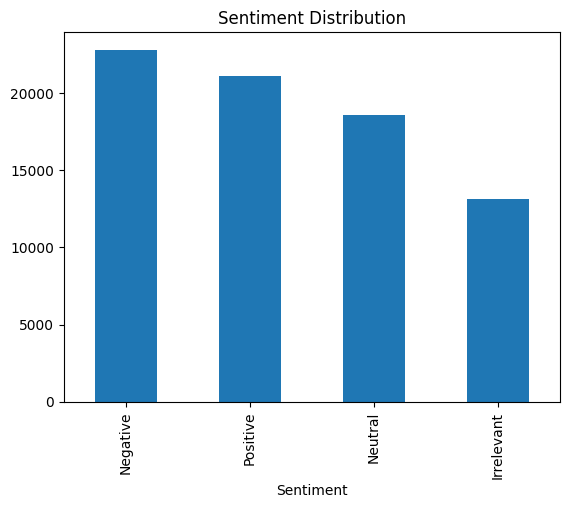

In [10]:
sentiment_counts.plot(kind = 'bar', title = 'Sentiment Distribution')

In [11]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

---
# Data Preprocessing

## Cleaning the Text Data

#### Convert to Lowercase:

In [12]:
df['Content'] = df['Content'].str.lower()

#### Remove URLs:

In [13]:
df['Content'] = df['Content'].str.replace(r'http\S+', '', regex=True)

#### Remove Mentions (e.g., @username):

In [14]:
df['Content'] = df['Content'].str.replace(r'@\w+', '', regex=True)

#### Remove Hashtags:

In [15]:
df['Content'] = df['Content'].str.replace(r'#\w+', '', regex=True)

#### Remove Punctuation:

In [16]:
df['Content'] = df['Content'].str.replace(r'[^\w\s]', '', regex=True)

#### Remove Extra Spaces:

In [17]:
df['Content'] = df['Content'].str.replace(r'\s+', ' ', regex=True).str.strip()

#### Display the cleaned Content

In [18]:
df

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you all
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,toronto is the arts and culture capital of can...
995,4359,CS-GO,Irrelevant,this is actually a good move tot bring more vi...
996,2652,Borderlands,Positive,today sucked so its time to drink wine n play ...
997,8069,Microsoft,Positive,bought a fraction of microsoft today small wins


### Boxplot for Sentiment Scores by Entity

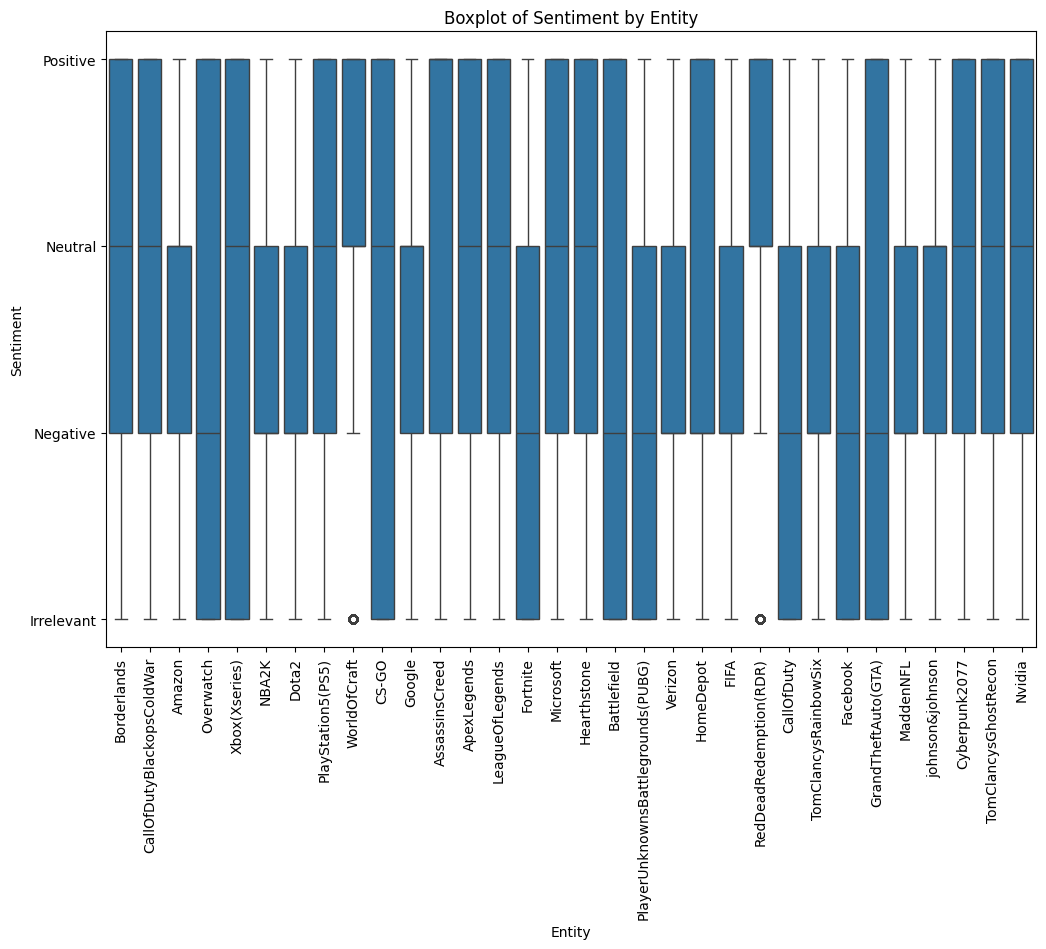

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 8))
sns.boxplot(x = 'Entity', y = 'Sentiment', data = df)
plt.title('Boxplot of Sentiment by Entity')
plt.xticks(rotation = 90)
plt.show()

### Distribution of Sentiment by Entity

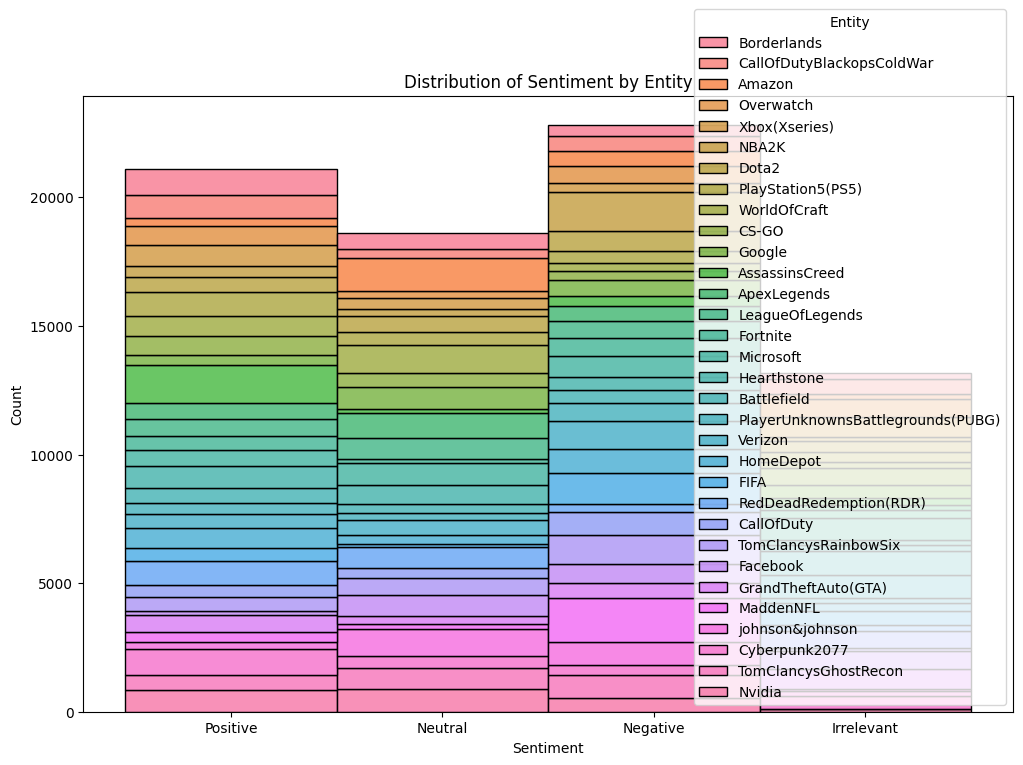

In [20]:
plt.figure(figsize = (12, 8))
sns.histplot(data = df, x = 'Sentiment', hue = 'Entity', multiple = 'stack')
plt.title('Distribution of Sentiment by Entity')
plt.show()

### Treemap of Sentiment by Entity

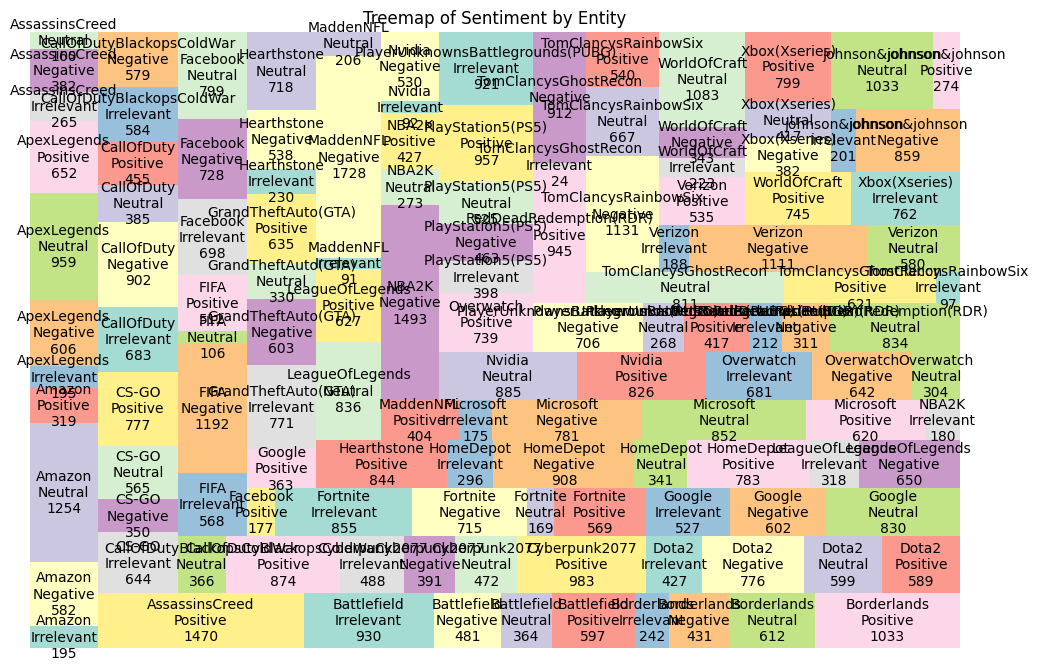

In [21]:
import squarify
sentiment_counts = df.groupby(['Entity', 'Sentiment']).size().reset_index(name = 'counts')
labels = sentiment_counts.apply(lambda x: f"{x['Entity']}\n{x['Sentiment']}\n{x['counts']}", axis = 1)

plt.figure(figsize = (12, 8))
squarify.plot(sizes = sentiment_counts['counts'], label = labels, color = sns.color_palette("Set3", len(labels)), alpha = .8)
plt.title('Treemap of Sentiment by Entity')
plt.axis('off')
plt.show()

### Bubble Chart of Sentiment by Entity

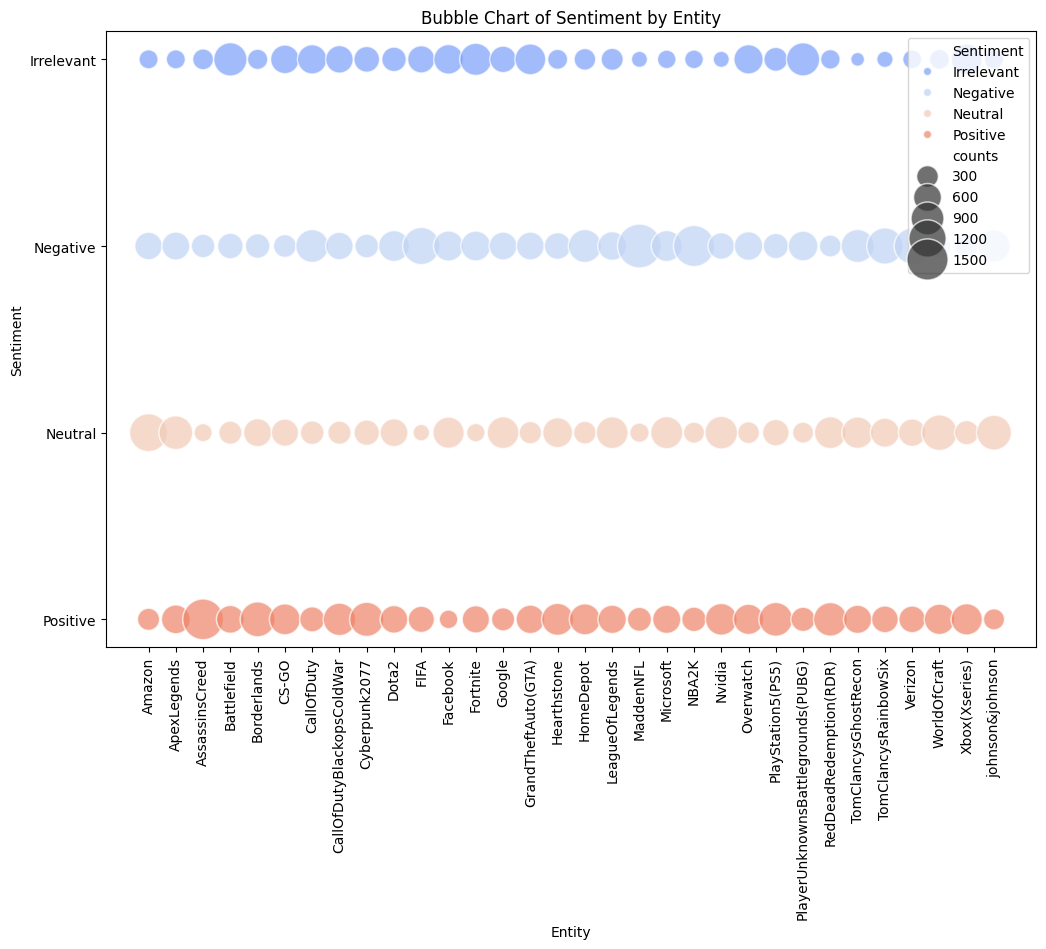

In [22]:
plt.figure(figsize = (12, 8))
sentiment_bubble = df.groupby(['Entity', 'Sentiment']).size().reset_index(name = 'counts')

sns.scatterplot(data = sentiment_bubble, x = 'Entity', y = 'Sentiment', size = 'counts', sizes = (100, 1000), hue = 'Sentiment', alpha = 0.7, palette = 'coolwarm')
plt.title('Bubble Chart of Sentiment by Entity')
plt.xticks(rotation = 90)
plt.xlabel('Entity')
plt.ylabel('Sentiment')
plt.show()

### Sentiment Comparison

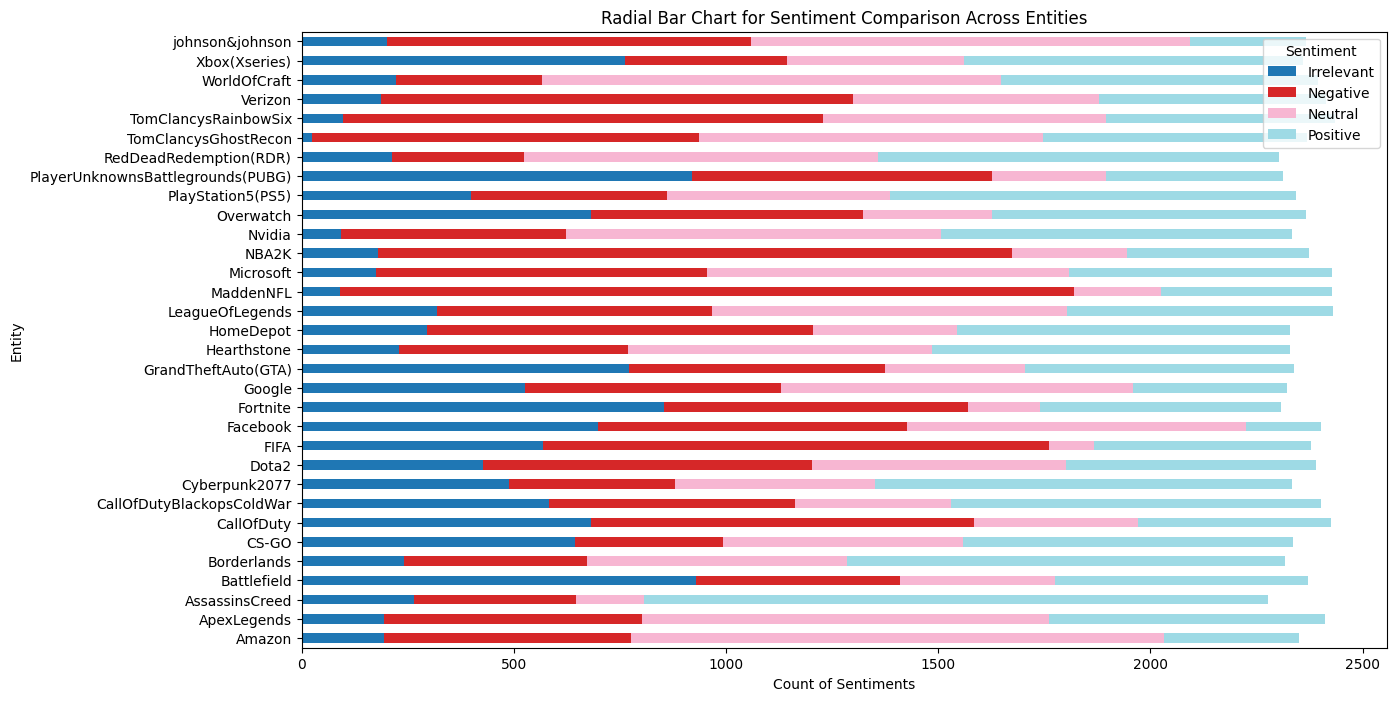

In [23]:
sentiment_counts = df.groupby(['Entity', 'Sentiment']).size().unstack().fillna(0)
sentiment_counts.plot(kind = 'barh', stacked = True, colormap = 'tab20', figsize = (14, 8))

plt.title('Radial Bar Chart for Sentiment Comparison Across Entities')
plt.xlabel('Count of Sentiments')
plt.ylabel('Entity')
plt.show()

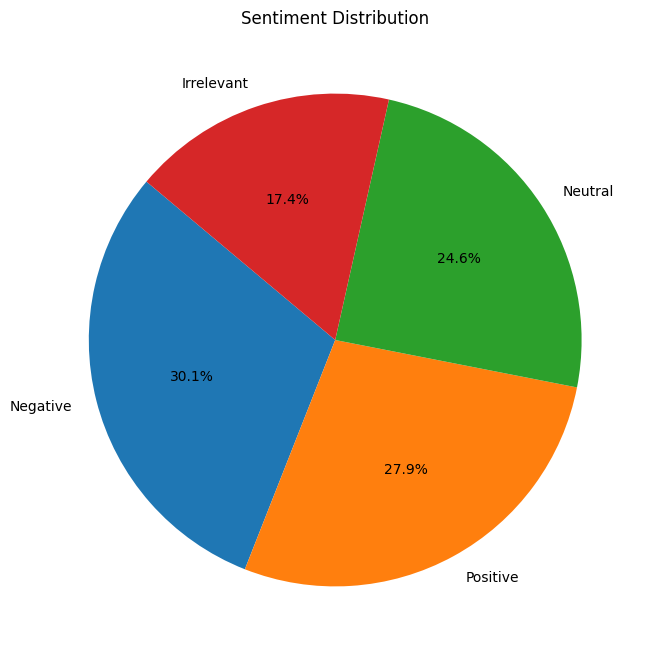

In [24]:
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize = (8, 8))
plt.pie(sentiment_counts, labels = sentiment_counts.index, autopct = '%1.1f%%', startangle = 140)
plt.title('Sentiment Distribution')
plt.show()

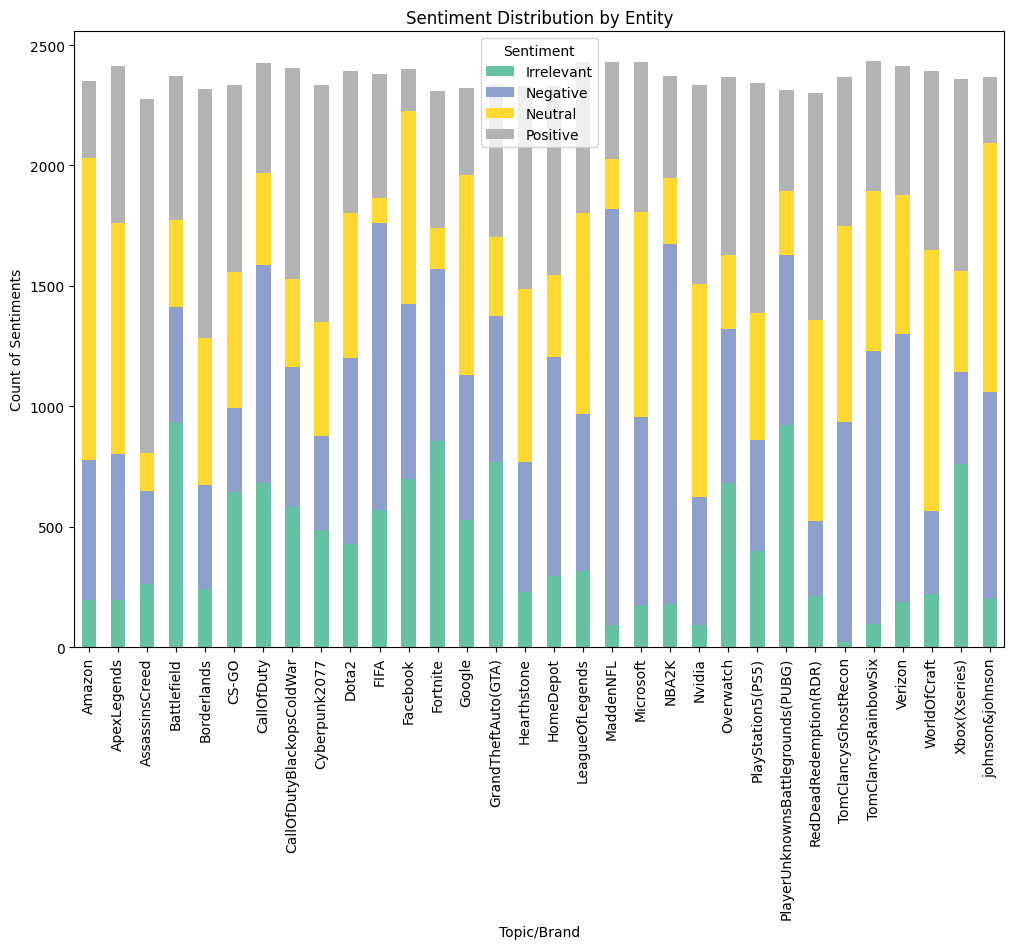

In [25]:
sentiment_topic = df.groupby(['Entity', 'Sentiment']).size().unstack().fillna(0)

sentiment_topic.plot(kind = 'bar', stacked = True, colormap = 'Set2', figsize = (12, 8))
plt.title('Sentiment Distribution by Entity')
plt.xlabel('Topic/Brand')
plt.ylabel('Count of Sentiments')
plt.xticks(rotation = 90)
plt.show()